In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import textwrap

In [3]:
df = pd.read_csv(f'D:/Documentos/Code/UDESC/Trabalho-de-Conclusao-de-Curso-TCC000x/Dados/Databases/INEP/NOVO_CENSO_EDUCACIONAL/2022/dados/microdados_ed_basica_2022.csv', sep=';', encoding='ISO-8859-1')

C:\Users\daniv\AppData\Local\Temp\ipykernel_4500\366755041.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'D:/Documentos/Code/UDESC/Trabalho-de-Conclusao-de-Curso-TCC000x/Dados/Databases/INEP/NOVO_CENSO_EDUCACIONAL/2022/dados/microdados_ed_basica_2022.csv', sep=';', encoding='ISO-8859-1')


In [6]:
colunas = ['CO_ENTIDADE', 'TP_SITUACAO_FUNCIONAMENTO', 'TP_LOCALIZACAO_DIFERENCIADA', 'TP_LOCALIZACAO', 'TP_DEPENDENCIA', 'QT_MAT_FUND', 'TP_AEE']
df_escolas = df[colunas]
df_escolas = df_escolas.drop_duplicates()
df_escolas = df_escolas.reset_index(drop=True)
df_escolas

,CO_ENTIDADE,TP_SITUACAO_FUNCIONAMENTO,TP_LOCALIZACAO_DIFERENCIADA,TP_LOCALIZACAO,TP_DEPENDENCIA,QT_MAT_FUND,TP_AEE
0,11022558,1,2.0,2,2,6.0,0.0
1,11024275,1,0.0,1,2,0.0,0.0
2,11024291,1,0.0,2,3,9.0,0.0
3,11024372,1,0.0,1,3,101.0,0.0
4,11024666,1,0.0,2,3,143.0,0.0
...,...,...,...,...,...,...,...
224644,53086007,1,0.0,1,4,19.0,0.0
224645,53087003,2,NaN,1,4,NaN,NaN
224646,53087011,1,NaN,1,4,NaN,NaN
224647,53088000,1,NaN,1,4,NaN,NaN


In [28]:
colunas = ['QT_MAT_BAS_ND',
           'QT_MAT_BAS_BRANCA',
           'QT_MAT_BAS_PRETA',
           'QT_MAT_BAS_PARDA',
           'QT_MAT_BAS_AMARELA',
           'QT_MAT_BAS_INDIGENA',]
df_alunos = df[colunas]
df_alunos = df_alunos.drop_duplicates()
df_alunos = df_alunos.reset_index(drop=True)
df_soma = df_alunos.sum()

novos_nomes = ['Não Declarado/a', 'Branco/a', 'Preto/a', 'Pardo/a', 'Amarelo/a', 'Indígena/a']

# Atribua os novos nomes ao índice do DataFrame df_soma
df_soma.index = novos_nomes

# Exiba o DataFrame com os novos nomes
print(df_soma)

Não Declarado/a    12818956.0
Branco/a           15044821.0
Preto/a             1590128.0
Pardo/a            16972764.0
Amarelo/a            158382.0
Indígena/a           313689.0
dtype: float64


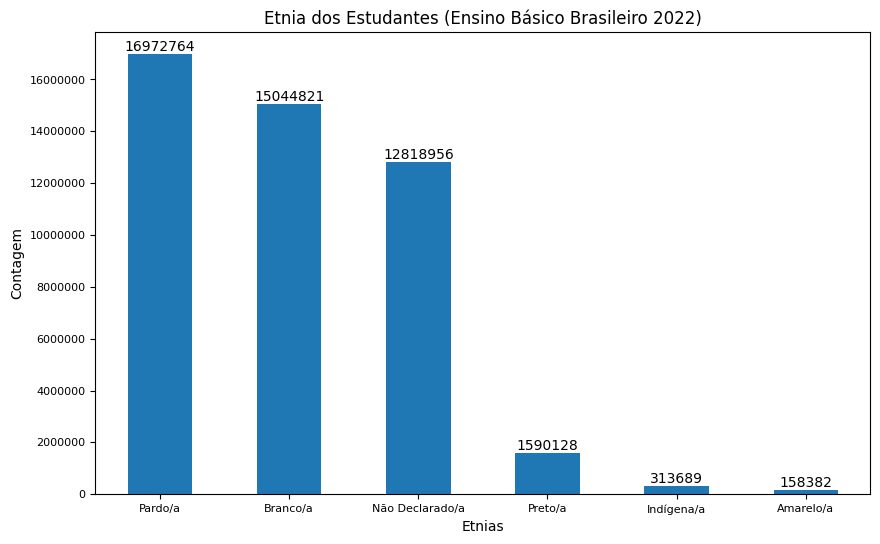

: 

In [35]:
df_soma_sorted = df_soma.sort_values(ascending=False)
df_soma_sorted = df_soma_sorted.astype(int)
plt.figure(figsize=(10, 6))
ax = df_soma_sorted.plot(kind='bar', fontsize=8, rot=0)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Etnia dos Estudantes (Ensino Básico Brasileiro 2022)') 
plt.xlabel('Etnias') 
plt.ylabel('Contagem') 
plt.xticks(rotation=0)

for i, v in enumerate(df_soma_sorted):
    ax.text(i, v, str(v), ha='center', va='bottom')


plt.show()

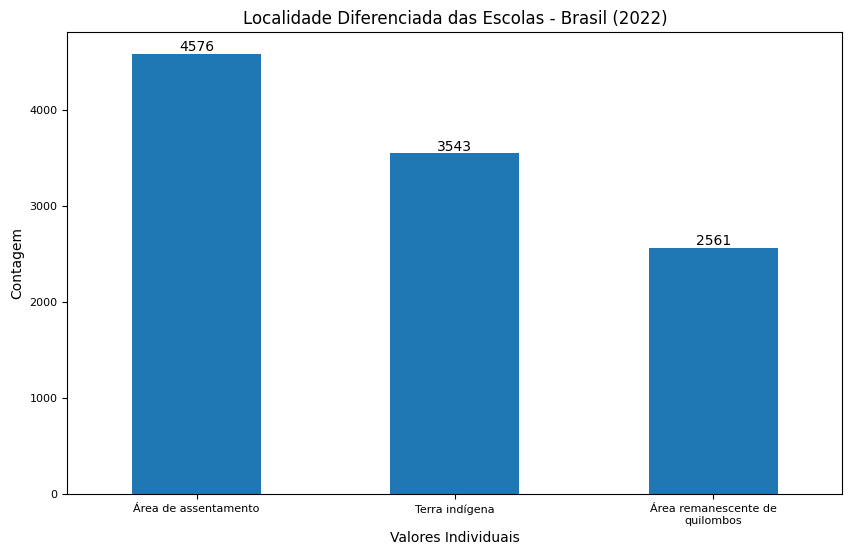

In [21]:
contagem_modalidades = df_escolas['TP_LOCALIZACAO_DIFERENCIADA'].value_counts()

indice_max = contagem_modalidades.idxmax()

contagem_modalidades = contagem_modalidades.drop(index=indice_max)

mapeamento_rotulos = {1: 'Área de assentamento', 2: 'Terra indígena', 3: 'Área remanescente de quilombos'}

contagem_modalidades.index = contagem_modalidades.index.map(mapeamento_rotulos)

plt.figure(figsize=(10, 6))
ax = contagem_modalidades.plot(kind='bar', fontsize=8, rot=0)



plt.title('Localidade Diferenciada das Escolas - Brasil (2022)') 
plt.xlabel('Valores Individuais')
plt.ylabel('Contagem')

limite_largura_coluna = 20

rotulos_personalizados = [textwrap.fill(texto, limite_largura_coluna) for texto in contagem_modalidades.index]

ax = plt.gca()
ax.set_xticklabels(rotulos_personalizados, rotation=0)

for i, v in enumerate(contagem_modalidades):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()